# Importing libraries #

In [ ]:
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
import scipy
import os
import math
import csv

# Function to sum spectra from each pixel of a region of interest (ROI) in the spectrum image #

In [ ]:
def stacked_roi (data, e_axis_start, e_axis_end, roi_size, roi_x, roi_y):
    s = data.isig[e_axis_start:e_axis_end] # data is not cropped, s is a "cropped view" of data
    #s.plot()
    im = hs.signals.Signal1D(s)
    #im.plot()
    left = roi_x
    right = left + roi_size
    top = roi_y
    bottom = top + roi_size
    roi = hs.roi.RectangularROI(left = left, right = right, top = top, bottom = bottom)
    im_roi = roi(im)
    im_roi.plot()
    stacked_s_roi = im_roi.sum()  # Sum the spectra in the ROI
    stacked_s_roi.plot()

# Function to sum spectra from each pixel of a region of interest (ROI) in the spectrum image & fit specific peaks in the summed spectrum #

In [ ]:
def fitting_roi (data, e_axis_start, e_axis_end, roi_size, roi_x, roi_y):
    s = data.isig[e_axis_start:e_axis_end] # data is not cropped, s is a "cropped view" of data
    #s.plot()
    im = hs.signals.Signal1D(s)
    #im.plot()
    left = roi_x
    right = left + roi_size
    top = roi_y
    bottom = top + roi_size
    roi = hs.roi.RectangularROI(left = left, right = right, top = top, bottom = bottom)
    im_roi = roi(im)
    #im_roi.plot()
    stacked_s_roi = im_roi.sum()  # Sum the spectra in the ROI
    stacked_s_roi.plot()
    m = stacked_s_roi.create_model()
    g1 = hs.model.components1D.Gaussian()
    g2 = hs.model.components1D.Gaussian()
    g1.name = "plasmonic extinctions"
    g2.name = "interband transitions"
    m.extend([g1,g2])
    m.components
    m.signal.estimate_poissonian_noise_variance()
    m.components.plasmonic_extinctions.centre.value = 100
    m.components.interband_transitions.centre.value = 400
    m.fit()
    m.print_current_values()
    m.plot()
    m.red_chisq.data

# Function for Low spacial resolution mapping of the peak position and intensity with the fitted peaks #

In [ ]:
def map_fitting_roi_scan (data, e_axis_start, e_axis_end, roi_size, x, y):
    map_plasmon_energy = []
    map_plasmon_intensity = []
    map_interband_energy = []
    map_interband_intensity = []
    for j in range(0, y, roi_size):
        plasmon_energy = []
        plasmon_intensity = []
        interband_energy = []
        interband_intensity = []
        for i in range(0, x, roi_size):
            s = data.isig[e_axis_start:e_axis_end] # data is not cropped, s is a "cropped view" of data
            #s.plot()
            im = hs.signals.Signal1D(s)
            #im.plot()
            left = i
            right = i + roi_size
            top = j
            bottom = j + roi_size
            roi = hs.roi.RectangularROI(left = left, right = right, top = top, bottom = bottom)
            #im_roi = roi.interactive(im, color = "red")
            im_roi = roi(im)
            #im_roi.plot()
            stacked_s_roi = im_roi.sum()  # Sum the spectra in the ROI
            #stacked_s_roi.plot()
            m = stacked_s_roi.create_model()
            g1 = hs.model.components1D.Gaussian()
            g2 = hs.model.components1D.Gaussian()
            g1.name = "plasmonic extinctions"
            g2.name = "interband transitions"
            m.extend([g1,g2])
            m.components
            m.signal.estimate_poissonian_noise_variance()
            m.components.plasmonic_extinctions.centre.value = 100
            m.components.interband_transitions.centre.value = 400
            m.fit()
            #m.print_current_values()
            e1 = m.components.plasmonic_extinctions.centre.value
            a1 = m.components.plasmonic_extinctions.A.value
            e2 = m.components.interband_transitions.centre.value
            a2 = m.components.interband_transitions.A.value
            plasmon_energy.append(e_axis_start + e1/100)
            plasmon_intensity.append(a1)
            interband_energy.append(e_axis_start + e2/100)
            interband_intensity.append(a2)
            all_vals.append([i+roi_size/2,j+roi_zise/2,e_axis_start + e1/100])
            #m.red_chisq.data
        map_plasmon_energy.append(plasmon_energy)
        map_plasmon_intensity.append(plasmon_intensity)
        map_interband_energy.append(interband_energy)
        map_interband_intensity.append(interband_intensity)
    return map_plasmon_energy, map_plasmon_intensity, map_interband_energy, map_interband_intensity

# Function for High spacial resolution (using rolling average) mapping of the peak position and intensity with the fitted peaks #

In [ ]:
def map_fitting_rolling_average (data, e_axis_start, e_axis_end, roi_size, x, y):
    map_plasmon_energy = []
    map_plasmon_intensity = []
    map_interband_energy = []
    map_interband_intensity = []
    for j in range(0, y, 1):
        plasmon_energy = []
        plasmon_intensity = []
        interband_energy = []
        interband_intensity = []
        for i in range(0, x, 1):
            s = data.isig[e_axis_start:e_axis_end] # data is not cropped, s is a "cropped view" of data
            #s.plot()
            im = hs.signals.Signal1D(s)
            #im.plot()
            left = i
            right = i + roi_size
            top = j
            bottom = j + roi_size
            roi = hs.roi.RectangularROI(left = left, right = right, top = top, bottom = bottom)
            #im_roi = roi.interactive(im, color = "red")
            im_roi = roi(im)
            #im_roi.plot()
            stacked_s_roi = im_roi.sum()  # Sum the spectra in the ROI
            #stacked_s_roi.plot()
            m = stacked_s_roi.create_model()
            g1 = hs.model.components1D.Gaussian()
            g2 = hs.model.components1D.Gaussian()
            g1.name = "plasmonic extinctions"
            g2.name = "interband transitions"
            m.extend([g1,g2])
            m.components
            m.signal.estimate_poissonian_noise_variance()
            m.components.plasmonic_extinctions.centre.value = 100
            m.components.interband_transitions.centre.value = 400
            m.fit()
            #m.print_current_values()
            e1 = m.components.plasmonic_extinctions.centre.value
            a1 = m.components.plasmonic_extinctions.A.value
            e2 = m.components.interband_transitions.centre.value
            a2 = m.components.interband_transitions.A.value
            plasmon_energy.append(e_axis_start + e1/100)
            plasmon_intensity.append(a1)
            interband_energy.append(e_axis_start + e2/100)
            interband_intensity.append(a2)
            #m.red_chisq.data
        map_plasmon_energy.append(plasmon_energy)
        map_plasmon_intensity.append(plasmon_intensity)
        map_interband_energy.append(interband_energy)
        map_interband_intensity.append(interband_intensity)
    return map_plasmon_energy, map_plasmon_intensity, map_interband_energy, map_interband_intensity

# Function for High spacial resolution (using rolling average) mapping of the intensity in the fitted zero-loss peak (ZLP) #

In [ ]:
def map_fitting_rolling_average_ZLP (data, roi_size, x, y):
    map_ZLP_intensity = []
    for j in range(0, y, 1):
        ZLP_intensity = []
        for i in range(0, x, 1):
            e_axis_start = -0.3
            e_axis_end = 1.0
            s = data.isig[e_axis_start:e_axis_end] # data is not cropped, s is a "cropped view" of data
            #s.plot()
            im = hs.signals.Signal1D(s)
            #im.plot()
            left = i
            right = i + roi_size
            top = j
            bottom = j + roi_size
            roi = hs.roi.RectangularROI(left = left, right = right, top = top, bottom = bottom)
            #im_roi = roi.interactive(im, color = "red")
            im_roi = roi(im)
            #im_roi.plot()
            stacked_s_roi = im_roi.sum()  # Sum the spectra in the ROI
            #stacked_s_roi.plot()
            m = stacked_s_roi.create_model()
            g = hs.model.components1D.Gaussian()
            g.name = "ZLP"
            m.append(g)
            m.components
            m.signal.estimate_poissonian_noise_variance()
            m.components.ZLP.centre.value = 0
            m.fit()
            #m.print_current_values()
            a = m.components.ZLP.A.value
            ZLP_intensity.append(a)
            #m.red_chisq.data
        map_ZLP_intensity.append(ZLP_intensity)
    return map_ZLP_intensity

# Function to sum spectra from each pixel of a region of interest (ROI) in the spectrum image, fit specific peaks in the summed spectrum and output the fitted spectrum plot while the ROI scans the spectrum image #

In [ ]:
def figures_fitting_roi_scan (data, e_axis_start, e_axis_end, roi_size, x, y, save_dir):
    for j in range(0, y-1, roi_size):
        for i in range(0, x-1, roi_size):
            s = data.isig[e_axis_start:e_axis_end] # data is not cropped, s is a "cropped view" of data
            #s.plot()
            im = hs.signals.Signal1D(s)
            #im.plot()
            left = i
            right = i + roi_size
            top = j
            bottom = j + roi_size
            roi = hs.roi.RectangularROI(left = left, right = right, top = top, bottom = bottom)
            #im_roi = roi.interactive(im, color = "red")
            im_roi = roi(im)
            #im_roi.plot()
            stacked_s_roi = im_roi.sum()  # Sum the spectra in the ROI
            #stacked_s_roi.plot()
            m = stacked_s_roi.create_model()
            g1 = hs.model.components1D.Gaussian()
            g2 = hs.model.components1D.Gaussian()
            g1.name = "plasmonic extinctions"
            g2.name = "interband transitions"
            m.extend([g1,g2])
            m.components
            m.signal.estimate_poissonian_noise_variance()
            m.components.plasmonic_extinctions.centre.value = 100
            m.components.interband_transitions.centre.value = 400
            m.fit()
            #m.print_current_values()
            fig = plt.figure(figsize = (10, 6))
            m.plot()
            filename = os.path.join(save_dir, f"fit_result_position_{i}_{j}.png")
            plt.savefig(filename, dpi = 300, bbox_inches = 'tight')
            plt.close()
            #m.red_chisq.data

# We will now use the above defined functions to analyse an EELS data #

# Loading the EELS data #

In [ ]:
path = "/Users/swarnendudas/SI-EELS (aligned) denoised.dm4"
data = hs.load(path)

# Cropping the EELS data based on our energy range of interest #

In [ ]:
e_axis_start = 1.8
e_axis_end = 8.0
s = data.isig[e_axis_start:e_axis_end] # data is not cropped, s is a "cropped view" of data
s.plot()

# Checking the ROI size for optimum signal-to-noise ratio #

In [ ]:
e_axis_start = 1.8
e_axis_end = 8.0
roi_x = 70
roi_y = 300
roi_size = 5

stacked_roi (data, e_axis_start, e_axis_end, roi_size, roi_x, roi_y)

# Checking the curve fitting on the summed spectrum from a ROI #
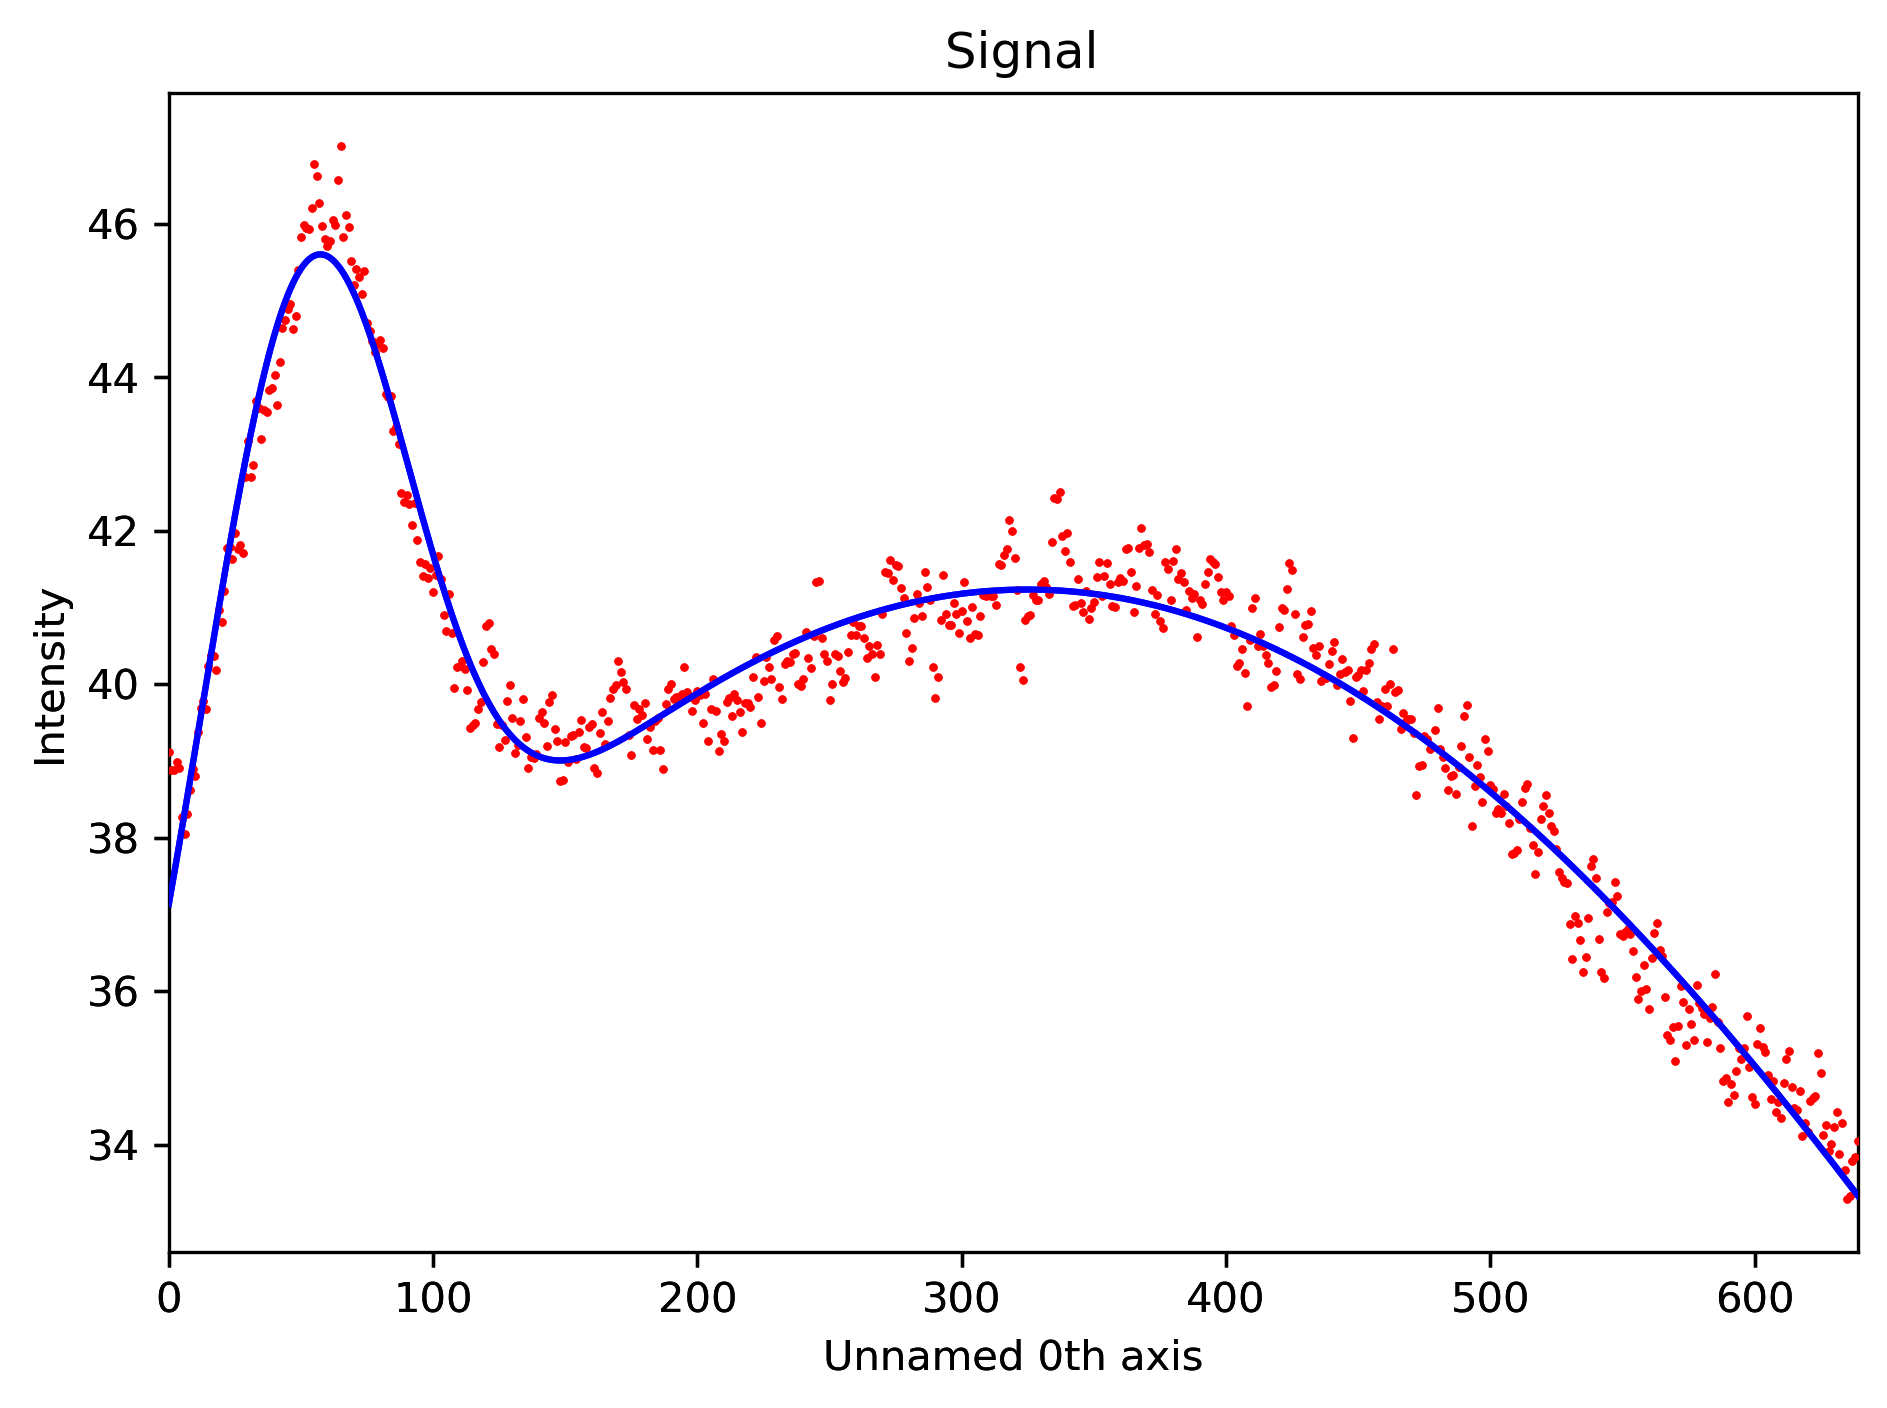

In [ ]:
e_axis_start = 1.8
e_axis_end = 8.0
roi_x = 70
roi_y = 300
roi_size = 5

fitting_roi (data, e_axis_start, e_axis_end, roi_size, roi_x, roi_y)

# Dimension of our spectrum image #

In [ ]:
x = data.axes_manager["x"].size
y = data.axes_manager["y"].size
x,y

# Low spacial resolution mapping #
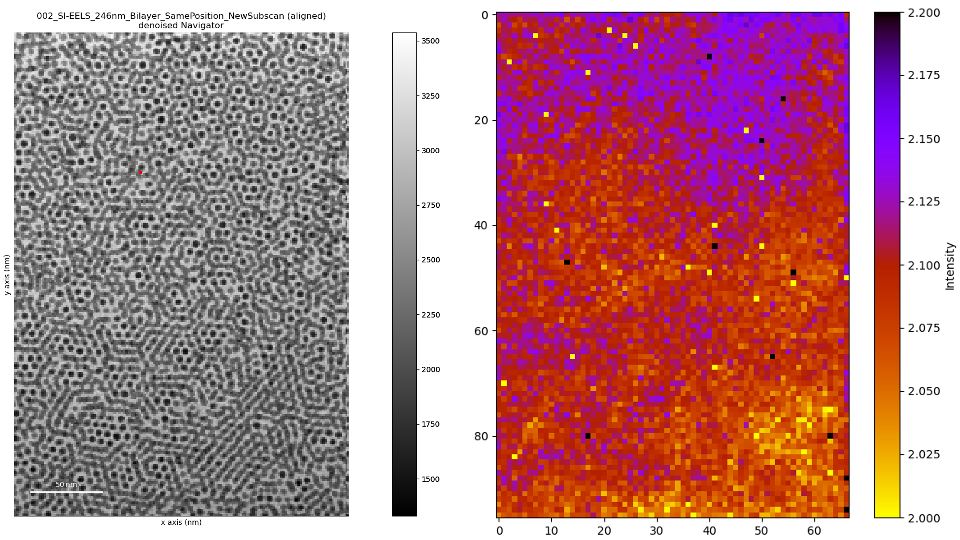

In [ ]:
e_axis_start = 1.3
e_axis_end = 8.0
roi_size = 3

map_plasmon_energya, map_plasmon_intensitya, map_interband_energya, map_interband_intensitya = map_fitting_roi_scan (data, e_axis_start, e_axis_end, roi_size, x, y)

# High spacial resolution (using rolling average) mapping #
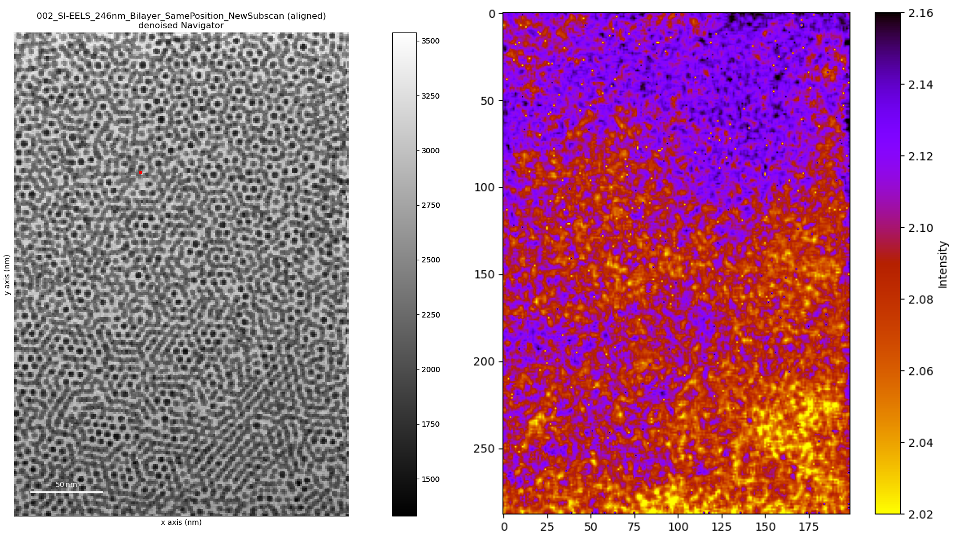

In [ ]:
e_axis_start = 1.8
e_axis_end = 8.0
roi_size = 3
map_plasmon_energyb, map_plasmon_intensityb, map_interband_energyb, map_interband_intensityb = map_fitting_rolling_average (data, e_axis_start, e_axis_end, roi_size, x, y)

# Save the fitted spectrum plot while the ROI scans the spectrum image #

In [ ]:
save_dir = "Fitted_Plots"
os.makedirs(save_dir, exist_ok=True)
figures_fitting_roi_scan (data, e_axis_start, e_axis_end, roi_size, x, y, save_dir)

# Save the output list to a CSV file #

In [ ]:
with open('map_plasmon_energyb.csv', 'w', newline = '') as f:
    writer = csv.writer(f)
    writer.writerows(map_plasmon_energyb)

# Load the list from the CSV file #

In [ ]:
with open('map_plasmon_energyb.csv', 'r', newline = '') as f:
    reader = csv.reader(f, quoting = csv.QUOTE_NONNUMERIC)
    map_plasmon_energyb = list(reader)

# Plotting the EELS map #

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

# Plot the data
im = ax.imshow(map_plasmon_energyb, cmap = 'gnuplot_r', aspect='1.0')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Energy loss (eV)', rotation = 90)

plt.show()

# ZLP intensity in vacuum (I_0) #

In [ ]:
e_axis_start = -0.3
e_axis_end = 1.0
s = data.isig[e_axis_start:e_axis_end] # data is not cropped, s is a "cropped view" of data
#s.plot()

# Location of vacuum in spectrum image
roi_size = 10
roi_x = 0
roi_y = 183

im = hs.signals.Signal1D(s)
#im.plot()
left = roi_x
right = left + roi_size
top = roi_y
bottom = top + roi_size
roi = hs.roi.RectangularROI(left = left, right = right, top = top, bottom = bottom)
im_roi = roi(im)
#im_roi.plot()

stacked_s_roi = im_roi.sum()  # Sum the spectra in the ROI
#stacked_s_roi.plot()

m = stacked_s_roi.create_model()
g = hs.model.components1D.SplitVoigt() #or Gaussian()
g.name = "ZLP"
m.append(g)
m.components
m.signal.estimate_poissonian_noise_variance()
m.components.ZLP.fraction.value = 0.9
m.components.ZLP.centre.value = 0
m.fit()
m.print_current_values()
m.plot()
m.red_chisq.data

In [ ]:
I_0 = m.components.ZLP.A.value

# High spacial resolution (using rolling average) mapping of the ZLP intensity #

In [ ]:
roi_size = 3
map_ZLP_intensityb = map_fitting_rolling_average_ZLP (data, roi_size, x, y)

# Approximate thickness measurement from ZLP intensity change #

In [ ]:
map_delta_tb = []
for j in range(0, y):
    delta_t = []
    for i in range(0, x):
        delta_t.append(I_0 - map_ZLP_intensityb[j][i])
    map_delta_tb.append(delta_t)